# Data Analysis - Topic Modeling

## Introduction:

Embarking on the exploration of prevalent topics within the climate change discourse on Twitter, I employ an advanced machine learning technique, specifically BERTopic. This approach aims to unravel nuanced themes through data analysis and visualization methods, shedding light on the most discussed subjects in the Twitter community.

Furthermore, an exploration into the temporal dynamics of these identified topics takes shape. Employing a variety of visualization methods, this analysis shows the evolving trends of climate change discussions over time, offering valuable insights into the dynamic nature of discussion on Twitter.

Subsequent analyses extend to probing the correlation between public sentiment, extreme natural events, and the release of environmental policies. The observed peaks and fluctuations in the graphical representations serve as crucial indicators for predicting relationships between public perception and external factors such as extreme weather occurrences and policy releases.

## Import fundamental packages to load dataset

1. import panda
2. read dataset from my github raw data link

In [4]:
import pandas as pd
import io

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/STATS201-PS2-Jenny/main/Data/processed%20data/cleaned_dataset.csv")
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,mentioned_users,partial_clean,cleaned_text
0,Lauren Boebert,@laurenboebert,2022-01-17T23:32:38.000Z,Lauren Boebert\n@laurenboebert\n·\nJan 18,The only solution I’ve ever heard the Left pro...,NaN,"1,683","2,259",11.7K,[],https://twitter.com/laurenboebert/status/14832...,NaN,The only solution I’ve ever heard the Left pro...,the only solution ive ever heard the left prop...
1,Catherine,@catherine___c,2022-01-17T22:54:02.000Z,Catherine\n@catherine___c\n·\nJan 17,Climate change doesn’t cause volcanic eruption...,NaN,158,64,762,[],https://twitter.com/catherine___c/status/14832...,NaN,Climate change doesn’t cause volcanic eruption...,climate change doesnt cause volcanic eruptions
2,king Keith,@KaConfessor,2022-01-17T23:51:41.000Z,king Keith\n@KaConfessor\n·\nJan 18,Vaccinated tennis ball boy collapses in the te...,NaN,24,118,159,['https://pbs.twimg.com/ext_tw_video_thumb/148...,https://twitter.com/KaConfessor/status/1483225...,NaN,Vaccinated tennis ball boy collapses in the te...,vaccinated tennis ball boy collapses in the te...
3,PETRIFIED CLIMATE PARENT,@climate_parent,2022-01-17T21:42:04.000Z,PETRIFIED CLIMATE PARENT\n@climate_parent\n·\n...,North America has experienced an average winte...,NaN,15,50,158,[],https://twitter.com/climate_parent/status/1483...,NaN,North America has experienced an average winte...,north america has experienced an average winte...
4,Thomas Speight,@Thomas_Sp8,2022-01-17T21:10:40.000Z,Thomas Speight\n@Thomas_Sp8\n·\nJan 17,They're gonna do the same with Climate Change ...,🅾,4,24,127,['https://pbs.twimg.com/profile_images/1544171...,https://twitter.com/Thomas_Sp8/status/14831850...,joeywreck,They're gonna do the same with Climate Change ...,they re gonna do the same with climate change ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9033,Dr Srijana Mitra Das,@srijanapiya17,2022-07-18T12:08:28.000Z,Dr Srijana Mitra Das\n@srijanapiya17\n·\nJul 18,#ClimateChange is now the greatest story on Ea...,NaN,2,16,24,['https://pbs.twimg.com/profile_images/5140754...,https://twitter.com/srijanapiya17/status/15490...,"DrSimEvans,DrSimEvans",#ClimateChange is now the greatest story on Ea...,climatechange is now the greatest story on ear...
9034,1%_Better_Every_Day,@jh336405,2022-07-18T00:33:20.000Z,1%_Better_Every_Day\n@jh336405\n·\nJul 18,Replying to \n@jh336405\n @acuna_r\n and 41 ot...,💯 💯 🌏,4,NaN,NaN,['https://pbs.twimg.com/profile_images/1442412...,https://twitter.com/jh336405/status/1548828230...,"jh336405,acuna_r,rahmstorf",Replying to and 41 others And Stefan Rahmstorf...,replying to and others and stefan rahmstorf co...
9035,David Schechter,@DavidSchechter,2022-07-18T21:13:13.000Z,David Schechter\n@DavidSchechter\n·\nJul 18,While Texans are being asked to use less elect...,NaN,3,14,23,['https://pbs.twimg.com/card_img/1549138950475...,https://twitter.com/DavidSchechter/status/1549...,GregAbbott_TX,While Texans are being asked to use less elect...,while texans are being asked to use less elect...
9036,Daily Climate,@TheDailyClimate,2022-07-18T10:15:09.000Z,Daily Climate\n@TheDailyClimate\n·\nJul 18,"Sea levels are rising, and communities are scr...",NaN,NaN,3,NaN,['https://pbs.twimg.com/card_img/1547862999808...,https://twitter.com/TheDailyClimate/status/154...,NHBulletinNews,"Sea levels are rising, and communities are scr...",sea levels are rising and communities are scra...


## Install and import topic modeling packages and visualization tools

In [ ]:
!pip install bertopic
!pip install gensim
!pip install wordcloud
!pip install matplotlib

In [7]:
import pandas as pd
import io
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance

## Apply BERT model to analyze the dataset

Attention: it takes a few minutes to load the data.

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")
main_representation = KeyBERTInspired()
aspect_model1 = PartOfSpeech("en_core_web_sm")
aspect_model2 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]
representation_model = {
   "Main": main_representation,
   "Aspect1":  aspect_model1,
   "Aspect2":  aspect_model2
}
model = BERTopic(verbose=True,vectorizer_model=vectorizer_model,representation_model=representation_model,calculate_probabilities=True)
doc = df.partial_clean.to_list()
timestamps = df.Timestamp	.to_list()
topics, probs = model.fit_transform(doc)

In [11]:
probs_df=pd.DataFrame(probs)
probs_df['main percentage'] = pd.DataFrame({'max': probs_df.max(axis=1)})

display(probs_df)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,main percentage
0,4.308374e-03,1.187352e-02,7.762305e-03,4.120084e-03,6.792475e-03,6.044923e-03,6.617930e-03,3.611406e-03,7.159215e-03,7.059313e-03,...,1.705878e-03,4.006892e-03,5.218486e-03,4.447684e-03,2.326594e-02,4.813188e-03,2.542610e-02,1.136312e-02,7.468217e-03,0.025665
1,2.655982e-03,2.419353e-02,3.506760e-03,2.962427e-03,4.095592e-02,2.807662e-03,4.711916e-03,2.446530e-03,6.033865e-03,7.230037e-03,...,1.778799e-03,2.883047e-03,5.817697e-03,3.118576e-03,6.061342e-03,3.467323e-03,4.716323e-03,4.532205e-03,3.894535e-03,0.042842
2,3.914575e-03,1.733615e-02,4.312659e-03,3.992871e-03,1.043127e-02,3.775608e-03,1.199635e-02,3.239992e-03,7.610394e-03,4.525679e-02,...,2.681417e-03,4.037079e-03,5.284154e-03,4.231561e-03,8.973881e-03,4.183620e-03,6.333647e-03,6.270390e-03,5.474584e-03,0.130175
3,3.064470e-03,6.580114e-03,3.361479e-03,3.143995e-03,5.682353e-03,2.748691e-03,2.954283e-03,3.072173e-03,4.535202e-03,3.724088e-03,...,1.646897e-03,2.857953e-03,4.257021e-02,3.110263e-03,4.480108e-03,5.704336e-03,3.965208e-03,5.107356e-03,4.800470e-03,0.042570
4,3.401173e-03,1.712861e-02,3.705779e-03,3.323412e-03,7.855539e-03,3.168677e-03,1.020786e-02,2.746776e-03,5.360796e-03,2.934746e-01,...,2.664635e-03,3.345092e-03,4.236175e-03,3.509491e-03,7.408085e-03,3.442879e-03,5.205871e-03,5.169837e-03,4.610125e-03,0.293475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9033,1.475658e-03,3.362626e-03,1.350236e-03,1.226810e-03,1.805221e-03,1.285676e-03,1.436062e-03,1.369158e-03,2.739416e-03,1.784630e-03,...,5.471870e-04,1.161485e-03,2.696585e-03,1.261822e-03,2.678139e-03,2.630529e-03,2.290895e-03,3.132144e-03,3.816860e-03,0.003981
9034,2.482237e-03,1.208213e-02,3.390545e-03,2.725759e-03,1.323457e-02,2.814509e-03,4.465162e-03,2.311162e-03,7.019155e-03,6.197584e-03,...,1.576018e-03,2.688786e-03,4.780366e-03,2.911984e-03,6.080129e-03,3.261829e-03,4.927404e-03,4.282131e-03,3.754354e-03,0.082764
9035,2.735737e-307,3.356704e-307,4.053024e-307,2.820764e-307,2.620177e-307,2.884772e-307,2.098435e-307,2.626117e-307,2.682194e-307,2.262858e-307,...,1.010088e-307,2.307430e-307,4.265934e-307,2.580570e-307,3.668432e-307,4.363631e-307,3.813494e-307,7.053591e-307,4.298901e-307,1.000000
9036,2.152004e-307,2.129750e-307,1.732326e-307,1.795848e-307,1.683933e-307,1.659664e-307,1.312516e-307,2.495070e-307,2.049369e-307,1.479846e-307,...,1.005648e-307,1.503082e-307,3.861451e-307,1.619123e-307,2.002547e-307,1.361579e-306,2.037702e-307,3.146410e-307,3.448792e-307,1.000000


## Visualizate the results

In [12]:
model.get_topic_info()
model.get_topic(0)
model.visualize_barchart()

In [13]:
import matplotlib.pyplot as plt

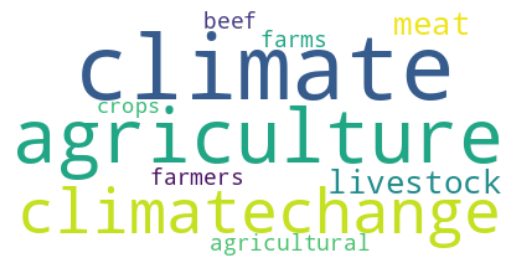

In [25]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(model, topic=0)

Attention: it may take ~20mins to load

In [15]:
topics_over_time = model.topics_over_time(doc, timestamps, nr_bins=20)

20it [09:19, 27.98s/it]


In [16]:
model.visualize_topics_over_time(topics_over_time, topics=[0,1,2,3,4,5])